<a href="https://colab.research.google.com/github/kmrstha/Regression/blob/main/Corona_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataScience_Dataset/corona tested.csv')
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [5]:
df.shape

(278848, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [7]:
# Calculating the unique number of values in each column
for column_name in df.columns:
    unique_values_count = len(df[column_name].unique())
    print(f"{column_name} - {unique_values_count}")


Ind_ID - 278848
Test_date - 51
Cough_symptoms - 3
Fever - 3
Sore_throat - 3
Shortness_of_breath - 3
Headache - 3
Corona - 3
Age_60_above - 3
Sex - 3
Known_contact - 3


In [8]:
# Check number of duplicate rows
df.duplicated().sum()

0

In [9]:
auto = df

In [10]:
auto = df.drop(['Ind_ID', 'Test_date'], axis=1)
auto

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,True,False,True,False,False,negative,NaN,NaN,Abroad
1,False,True,False,False,False,positive,NaN,NaN,Abroad
2,False,True,False,False,False,positive,NaN,NaN,Abroad
3,True,False,False,False,False,negative,NaN,NaN,Abroad
4,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,positive,NaN,male,Other
278844,False,False,False,False,False,negative,NaN,female,Other
278845,False,False,False,False,False,negative,NaN,male,Other
278846,False,False,False,False,False,negative,NaN,male,Other


In [11]:
for column_name, column_data in auto.items():
    print(f"---- {column_name} ---")
    print(column_data.value_counts())

---- Cough_symptoms ---
Cough_symptoms
False    236368
True      42228
Name: count, dtype: int64
---- Fever ---
Fever
False    256844
True      21752
Name: count, dtype: int64
---- Sore_throat ---
Sore_throat
False    276921
True       1926
Name: count, dtype: int64
---- Shortness_of_breath ---
Shortness_of_breath
False    277270
True       1577
Name: count, dtype: int64
---- Headache ---
Headache
False    276433
True       2414
Name: count, dtype: int64
---- Corona ---
Corona
negative    260227
positive     14729
other         3892
Name: count, dtype: int64
---- Age_60_above ---
Age_60_above
No     125703
Yes     25825
Name: count, dtype: int64
---- Sex ---
Sex
female    130158
male      129127
Name: count, dtype: int64
---- Known_contact ---
Known_contact
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64


In [12]:
auto = auto.dropna()

In [13]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
auto['Cough_symptoms'] = enc.fit_transform(auto[['Cough_symptoms']])
auto['Fever'] = enc.fit_transform(auto[['Fever']])
auto['Sore_throat'] = enc.fit_transform(auto[['Sore_throat']])
auto['Shortness_of_breath'] = enc.fit_transform(auto[['Shortness_of_breath']])
auto['Headache'] = enc.fit_transform(auto[['Headache']])
auto['Age_60_above'] = enc.fit_transform(auto[['Age_60_above']])
auto['Sex'] = enc.fit_transform(auto[['Sex']])
auto.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1.0,0.0,0.0,0.0,0.0,negative,0.0,1.0,Abroad
13728,1.0,0.0,0.0,0.0,0.0,negative,0.0,0.0,Abroad
13730,1.0,1.0,0.0,0.0,0.0,positive,1.0,0.0,Other
13731,0.0,0.0,0.0,0.0,0.0,other,0.0,0.0,Other
13732,0.0,0.0,0.0,0.0,0.0,other,0.0,0.0,Other


In [14]:
rank=['negative','positive','other']
oe = OrdinalEncoder(categories=[rank])
auto['Corona']=oe.fit_transform(auto[['Corona']])
auto

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Abroad
13728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abroad
13730,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Other
13731,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,Other
13732,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,Other
...,...,...,...,...,...,...,...,...,...
156035,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,Abroad
156036,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,Abroad
156037,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Abroad
156038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other


In [15]:
rank=['Abroad','Contact with confirmed','Other']
oe = OrdinalEncoder(categories=[rank])
auto['Known_contact']=oe.fit_transform(auto[['Known_contact']])

In [16]:
auto

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13730,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
13731,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
13732,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
156035,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
156036,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
156037,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


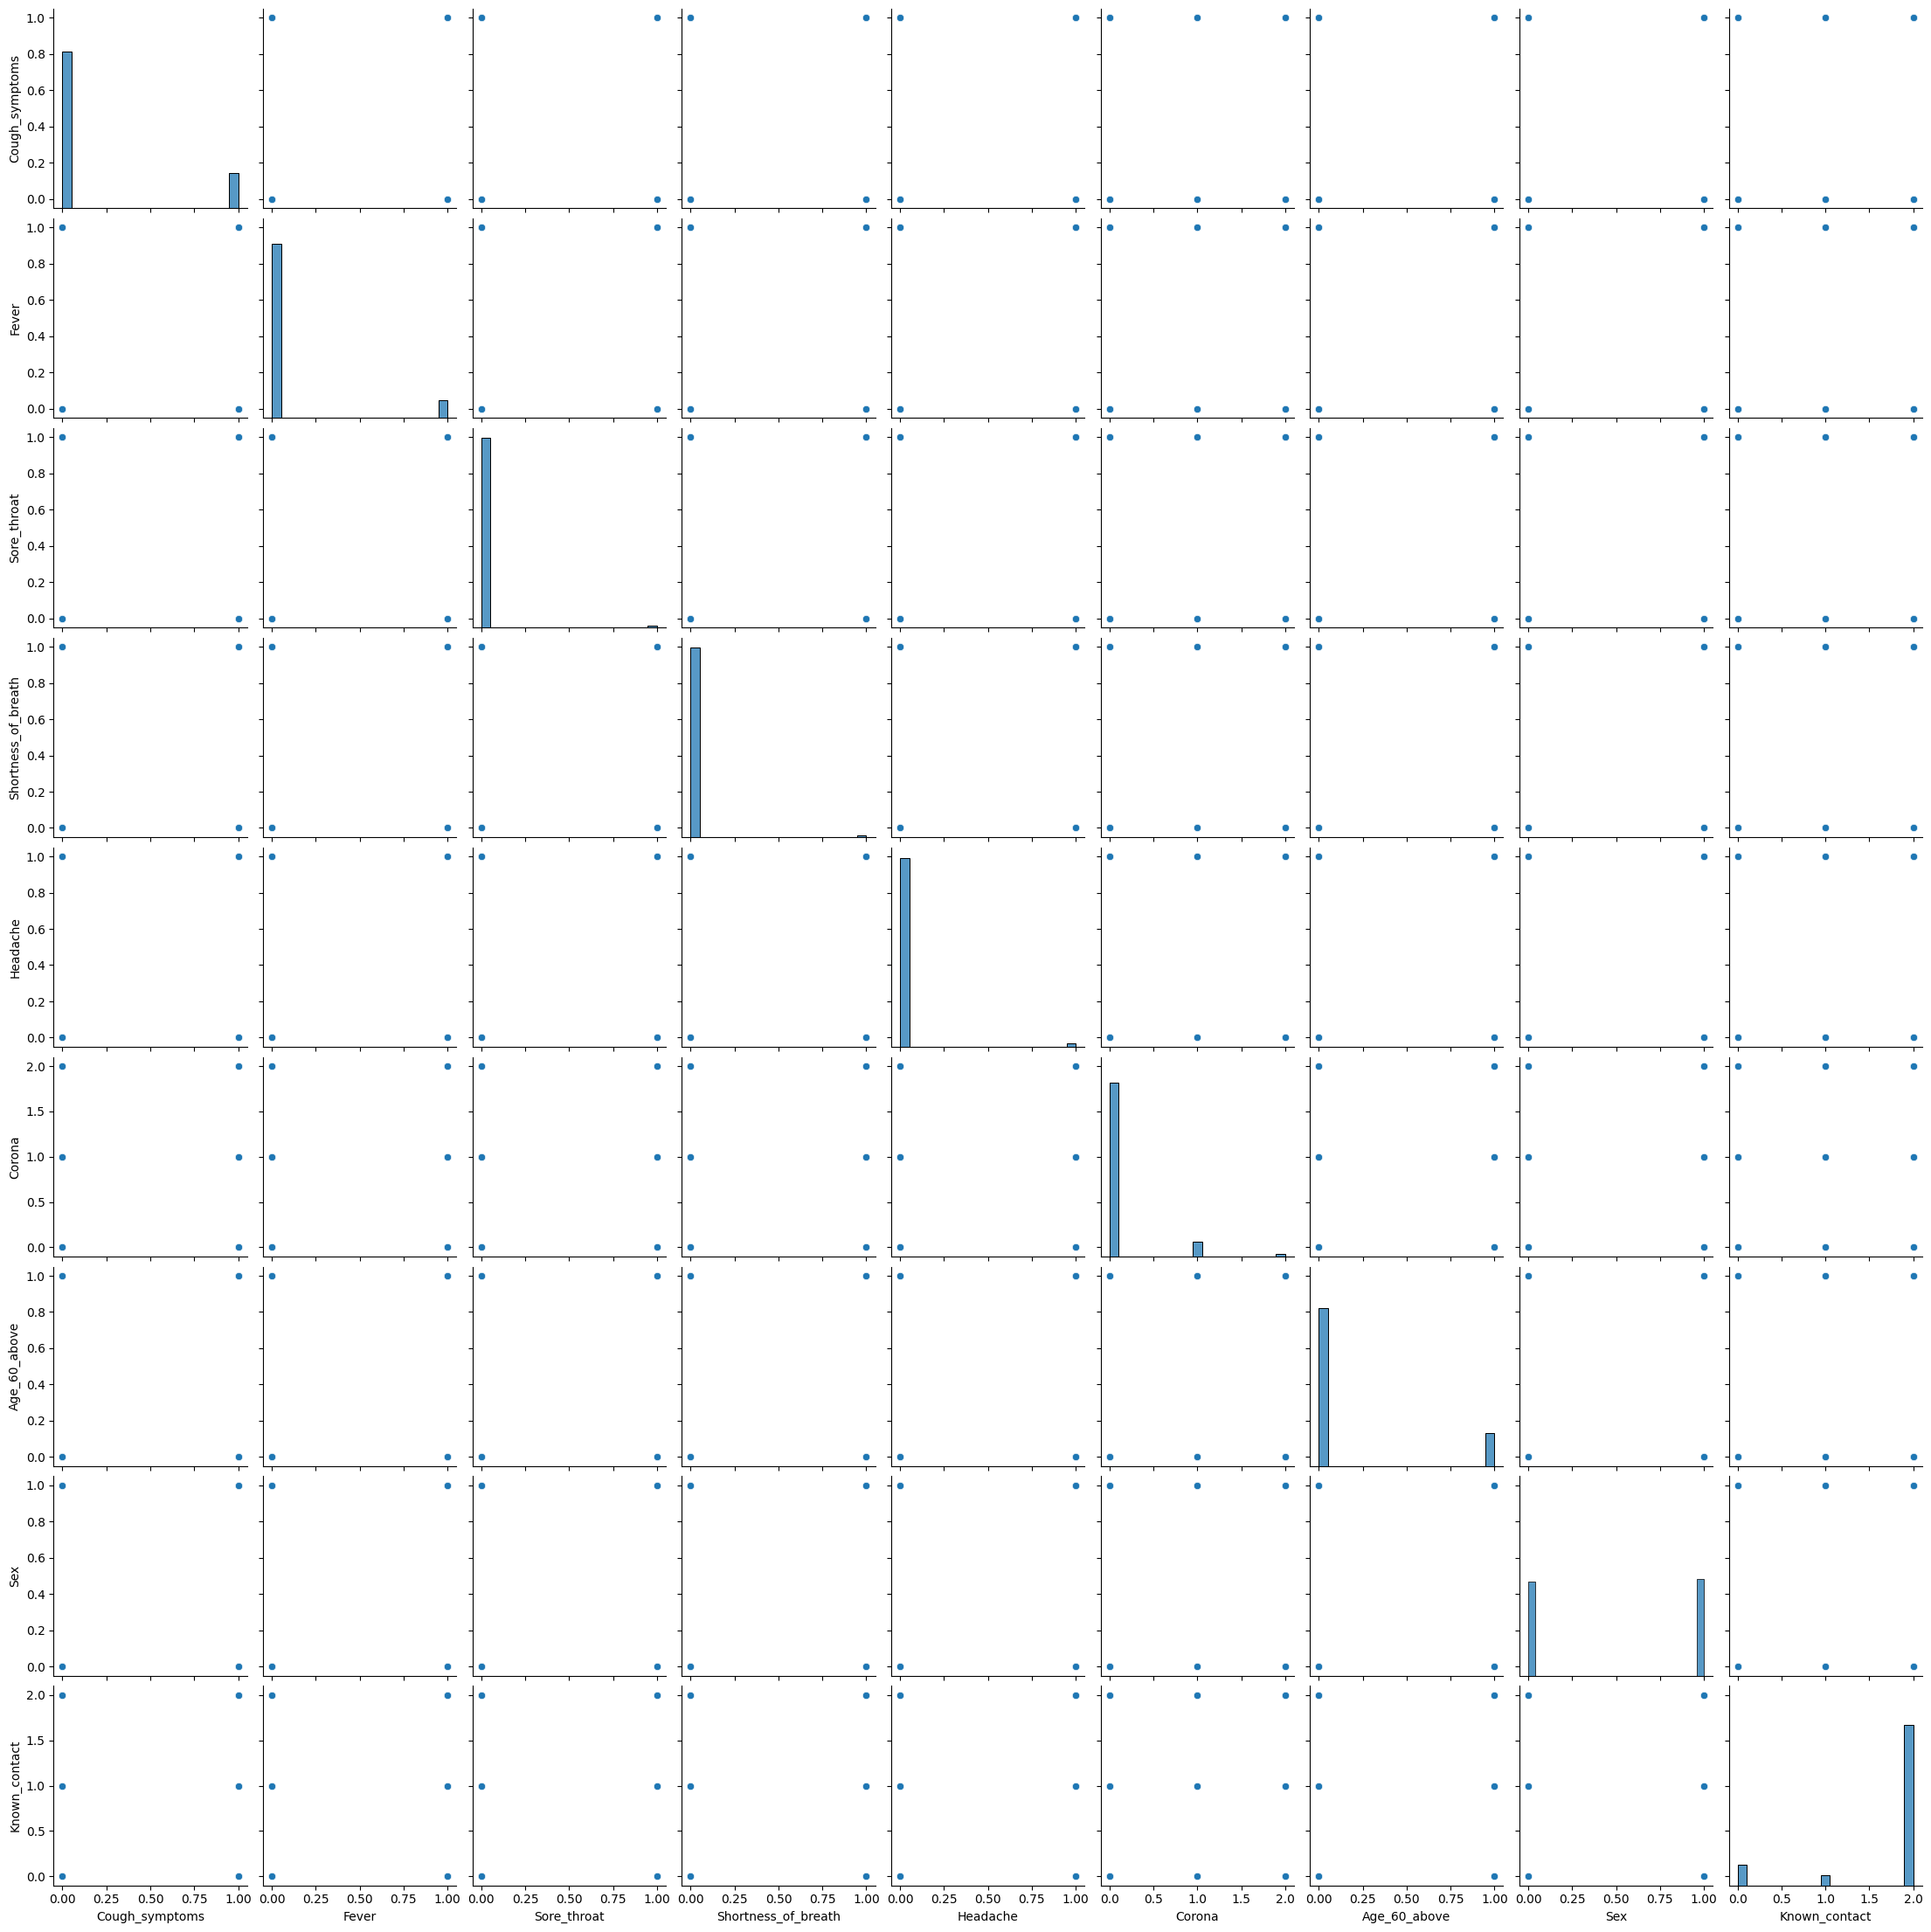

In [17]:
sns.pairplot(auto)

<Axes: xlabel='Sex', ylabel='count'>

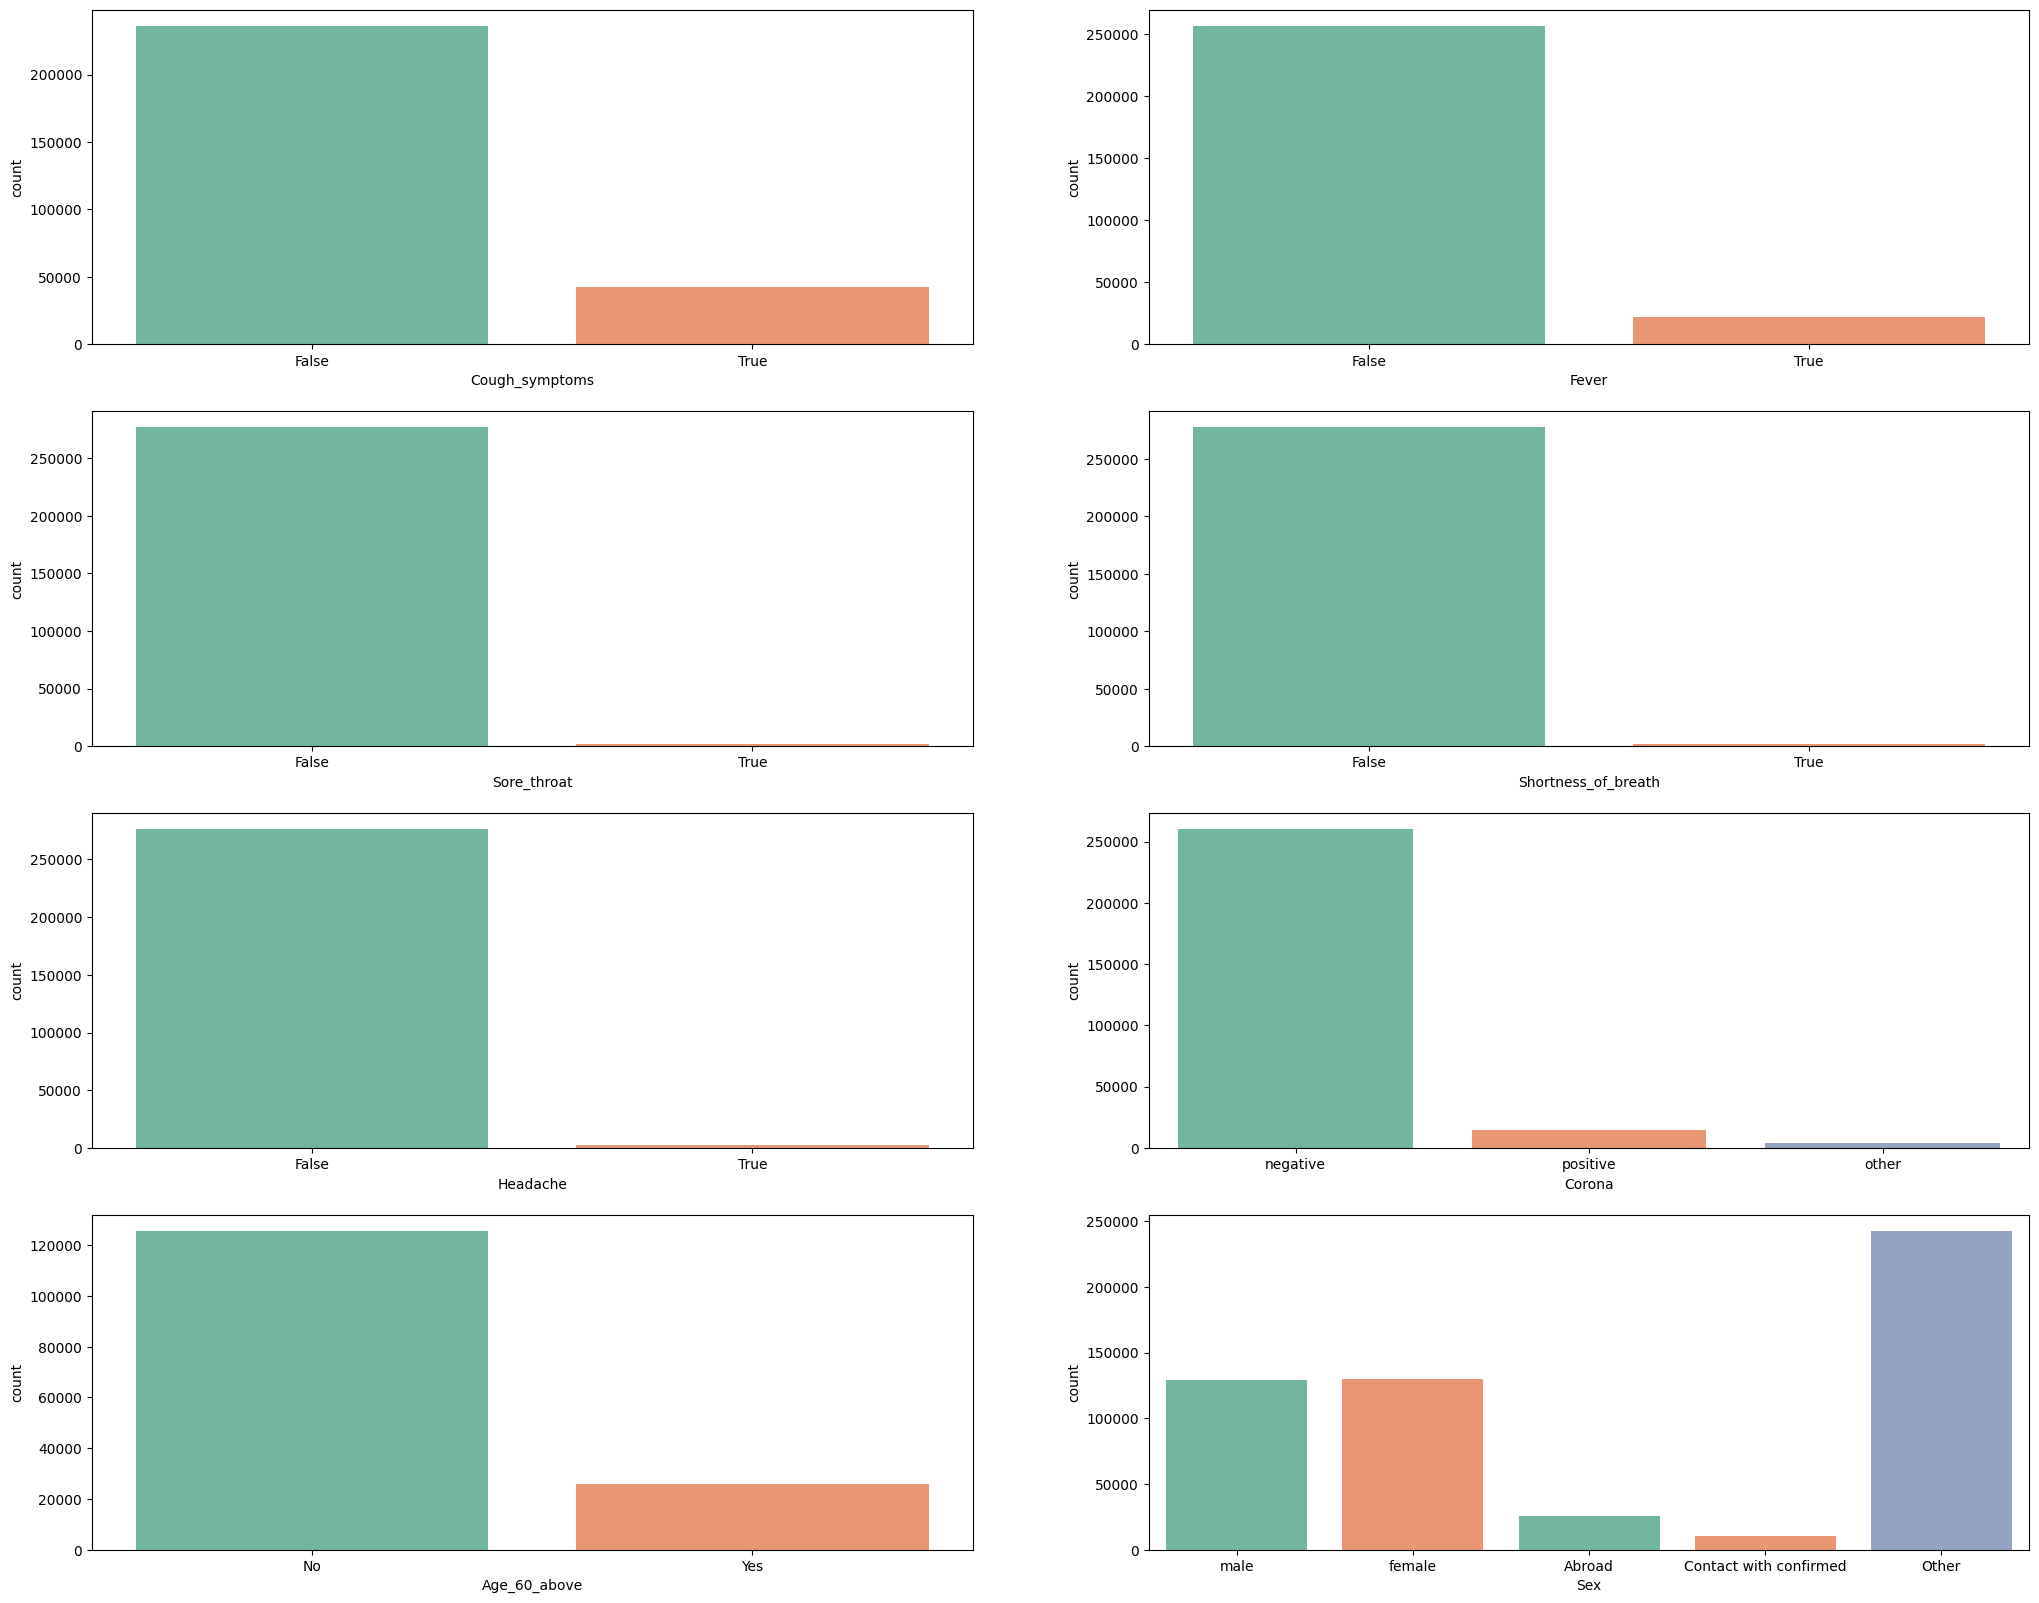

In [18]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Cough_symptoms', palette = 'Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'Fever', palette = 'Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'Sore_throat', palette = 'Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'Shortness_of_breath', palette = 'Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'Headache', palette = 'Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'Corona', palette = 'Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'Age_60_above', palette = 'Set2', data = df)

plt.subplot(4,2,8)
sns.countplot(x = 'Sex', palette = 'Set2', data = df)

plt.subplot(4,2,8)
sns.countplot(x = 'Known_contact', palette = 'Set2', data = df)

<Axes: xlabel='Known_contact', ylabel='count'>

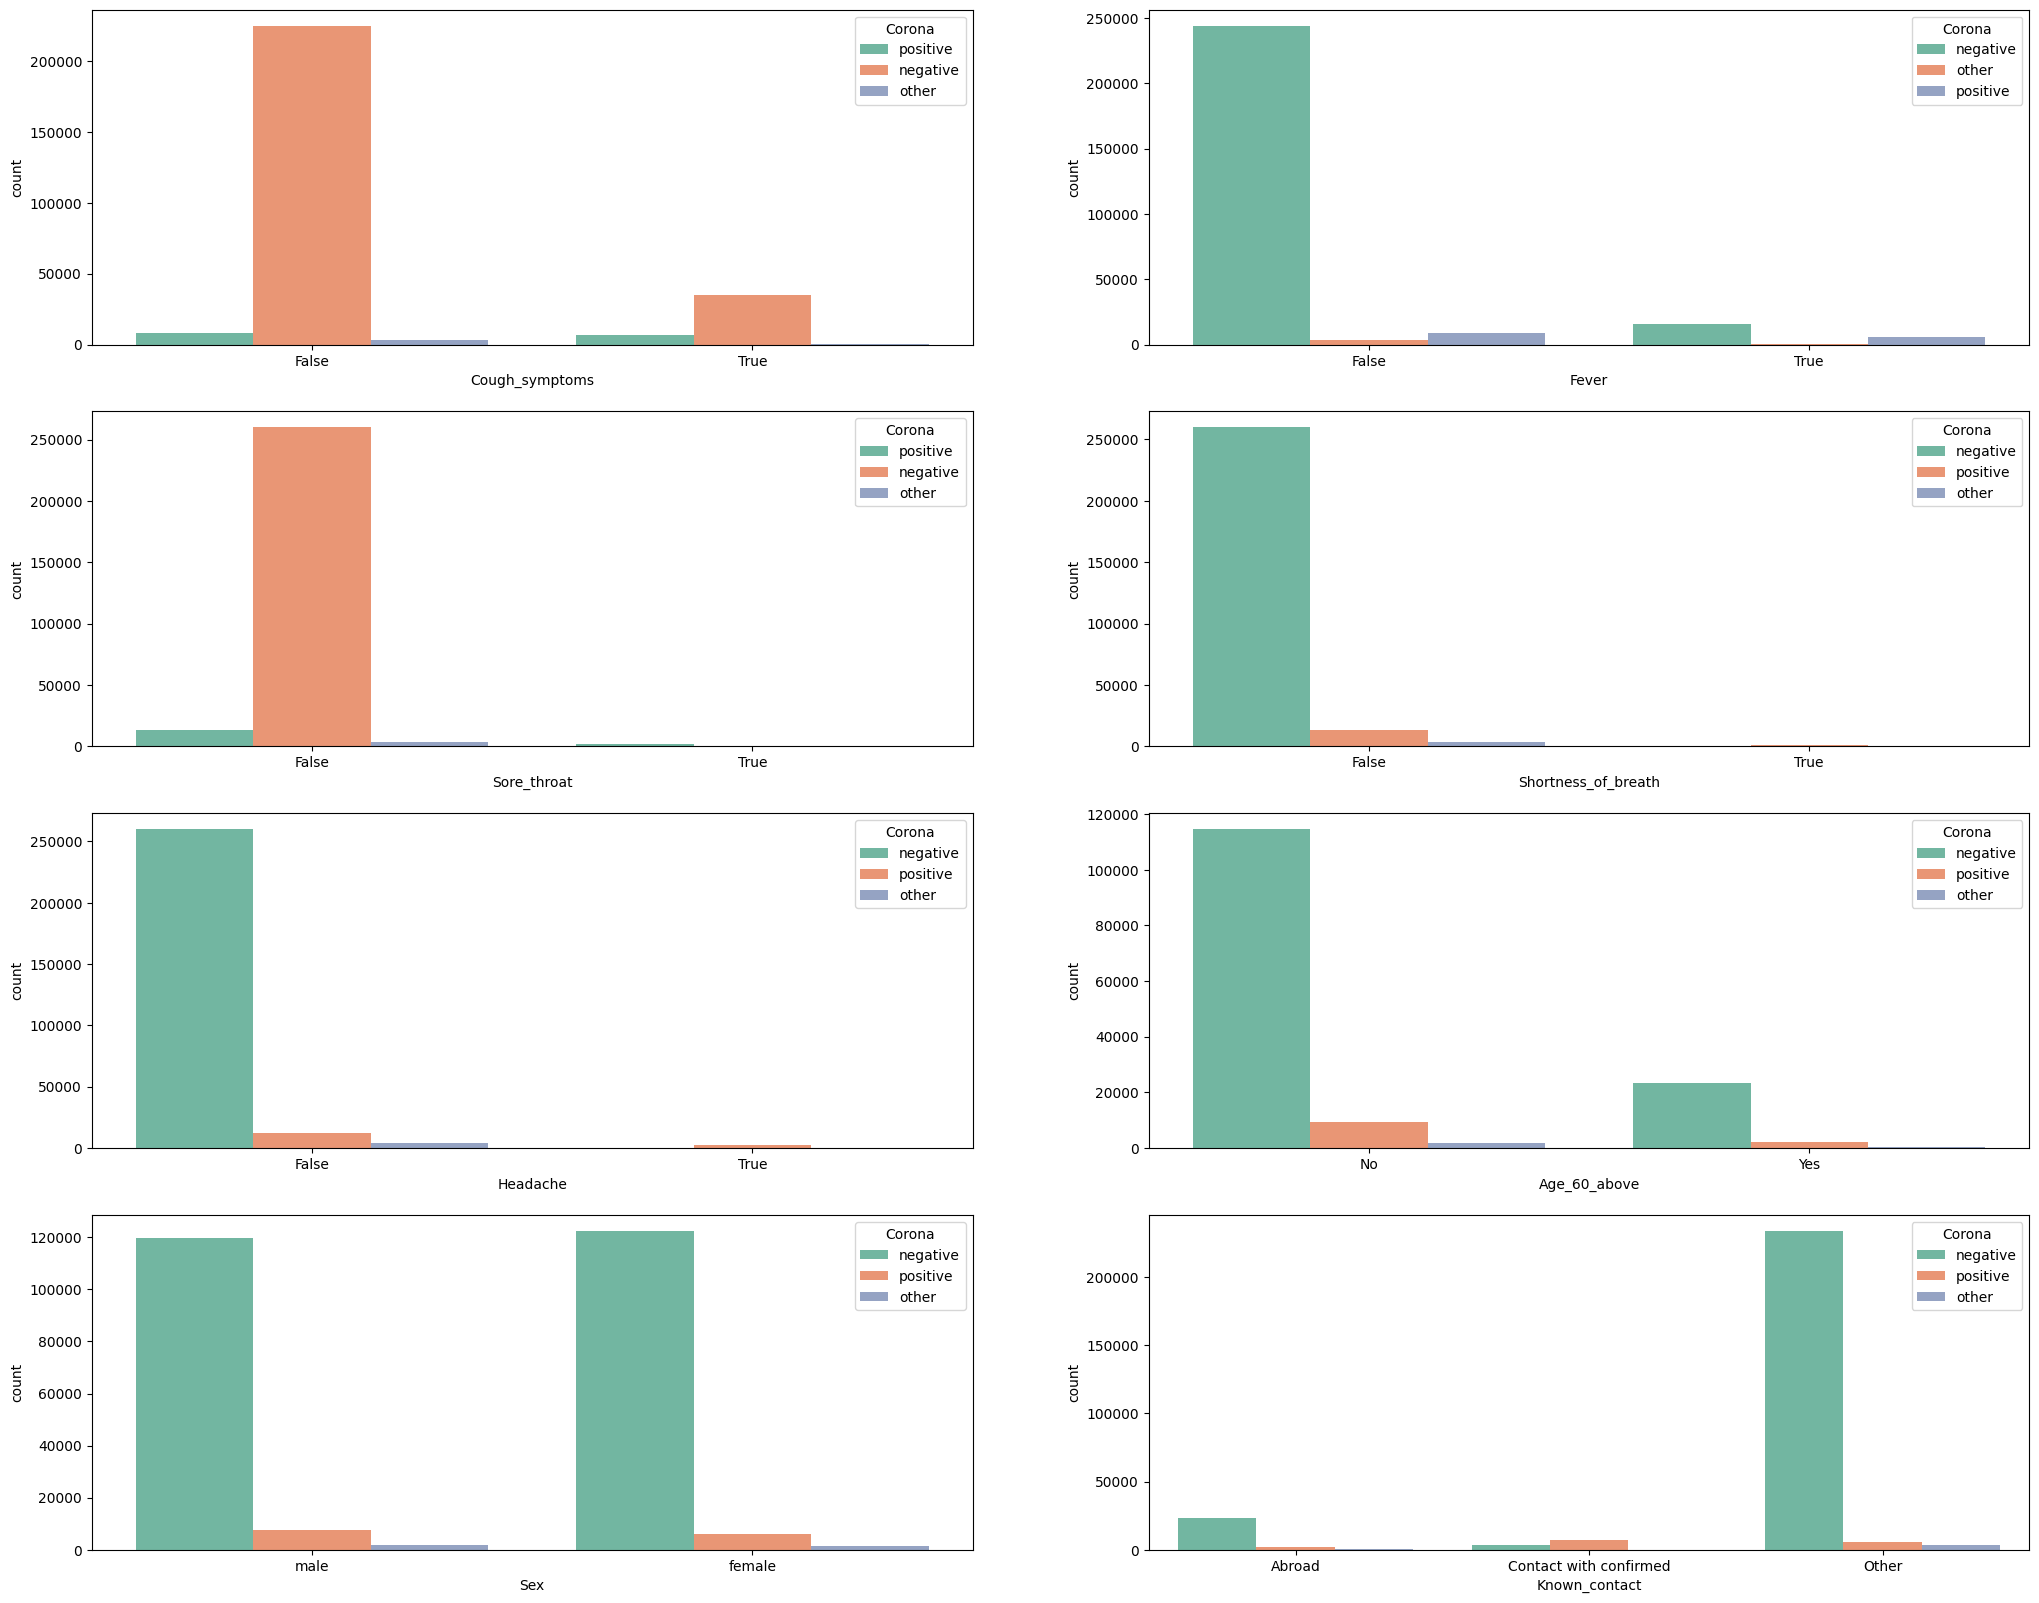

In [19]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Cough_symptoms', hue = 'Corona', palette = 'Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'Fever', hue = 'Corona',palette = 'Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'Sore_throat', hue = 'Corona', palette = 'Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'Shortness_of_breath', hue = 'Corona', palette = 'Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'Headache', hue = 'Corona', palette = 'Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'Age_60_above', hue = 'Corona', palette = 'Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'Sex', hue = 'Corona', palette = 'Set2', data = df)

plt.subplot(4,2,8)
sns.countplot(x = 'Known_contact', hue = 'Corona', palette = 'Set2', data = df)

In [20]:
auto.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Cough_symptoms,1.000000,0.445777,0.126039,0.118065,0.134880,0.166530,-0.044209,0.020280,-0.581565
Fever,0.445777,1.000000,0.144189,0.146251,0.199800,0.250817,-0.002942,0.037958,-0.335856
Sore_throat,0.126039,0.144189,1.000000,0.203336,0.337497,0.251146,-0.013590,-0.010070,-0.083582
Shortness_of_breath,0.118065,0.146251,0.203336,1.000000,0.219219,0.213970,0.013081,0.003950,-0.063799
Headache,0.134880,0.199800,0.337497,0.219219,1.000000,0.310913,-0.016348,-0.000109,-0.096707
Corona,0.166530,0.250817,0.251146,0.213970,0.310913,1.000000,0.016744,0.025543,-0.161289
Age_60_above,-0.044209,-0.002942,-0.013590,0.013081,-0.016348,0.016744,1.000000,-0.036249,0.062913
Sex,0.020280,0.037958,-0.010070,0.003950,-0.000109,0.025543,-0.036249,1.000000,-0.019556
Known_contact,-0.581565,-0.335856,-0.083582,-0.063799,-0.096707,-0.161289,0.062913,-0.019556,1.000000


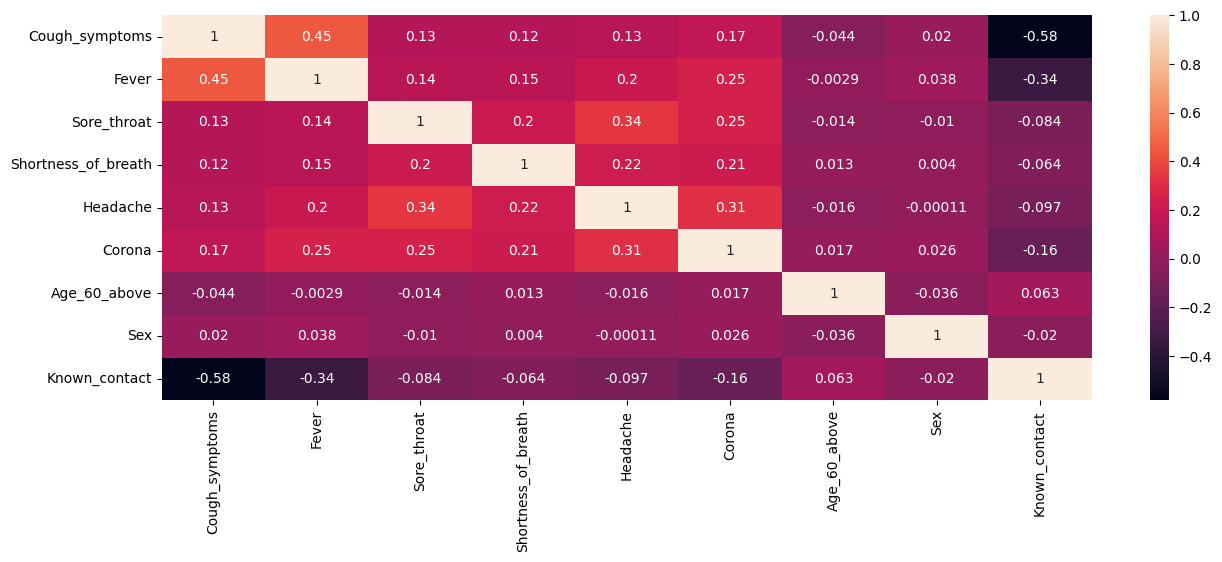

In [21]:
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [22]:
# train size-> min 2/3
# test size -> max 1/3
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(auto,train_size = 0.8,test_size = 0.2,random_state = 1)

In [23]:
df_train.shape

(110537, 9)

In [24]:
df_test.shape

(27635, 9)

In [25]:
total_len = (len(df))
print("All total length = ",total_len)
print("X_train length = ", len(df_train))
print("X_test length = ", len(df_test))

All total length =  278848
X_train length =  110537
X_test length =  27635


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# X_train = df_train[['Cough_symptoms','Fever',"Sore_throat",
#                     "Shortness_of_breath","Headache","Age_60_above",
#                     "Sex","Known_contact"]]

# y_train = df_train['Corona']

X_train, X_test, y_train, y_test = train_test_split(df_train[['Cough_symptoms', 'Fever', 'Sore_throat',
                    'Shortness_of_breath', 'Headache', 'Age_60_above',
                    'Sex', 'Known_contact']], df_train['Corona'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# df_test_predict = X_train.iloc[0:1]
# for linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

#for logistic regression
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train_scaled, y_train)

# #for polynomial regression
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_train_scaled)
# X_test_poly = poly.transform(X_test_scaled)

# # model.predict(df_test_predict)

LogisticRegression()

In [28]:
print("Linear regression = ", lr_model.score(X_test_scaled, y_test))
print("Logistic regression = ", lg_model.score(X_test_scaled, y_test))
# print("Polynomial features with linear regression = ", lr_model.score(X_test_poly, y_test))


Linear regression =  0.1649425700687872
Logistic regression =  0.9303871901574091


In [29]:
print("Linear regression = ",lr_model.score(X_train, y_train))
print("Logistic regression = ",lg_model.score(X_train, y_train))
# print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_train), y_train))

Linear regression =  0.04740392001943017
Logistic regression =  0.9102443768447003


In [30]:
data = df_test.iloc[10:11]
corona_status = data['Corona']
data = data.drop(['Corona'],axis = 1)
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
38000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [31]:
print("Predicted using linear regression",lr_model.predict(data))
print("Predicted using logistic regression",lg_model.predict(data))
# print("Predicted using Polynomial regression",pol_reg.predict(poly_reg.fit_transform(data)))

print("Corona status",corona_status)

Predicted using linear regression [0.06246439]
Predicted using logistic regression [0.]
Corona status 38000    0.0
Name: Corona, dtype: float64


In [32]:
data = df_test.iloc[1100:1101]
corona_status = data.iloc[0]['Corona']
data = data.drop(['Corona'],axis = 1)
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
112027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
print("Predicted using linear regression",lr_model.predict(data))
print("Predicted using logistic regression",lg_model.predict(data))
# print("Predicted using Polynomial regression",pol_reg.predict(poly_reg.fit_transform(data)))
print("Corona status",corona_status)

Predicted using linear regression [0.10425899]
Predicted using logistic regression [0.]
Corona status 0.0


In [35]:
test_data = auto.iloc[101:102]
# test_data
corona = test_data['Corona']
test_data.drop(['Corona'], axis=1, inplace=True)
print("Predicted output = ", lg_model.predict(test_data)[0])
print("Actual Output = ", corona.values[0])


Predicted output =  0.0
Actual Output =  0.0


In [ ]:
data = {'Cough_symptoms':[int(input("Enter Cough symptom = ")) for i in range(1)],
        'Fever':[int(input("Enter Fever = ")) for i in range(1)],
        "Sore_throat":[int(input("Sore throat = ")) for i in range(1)],
        "Shortness_of_breath":[int(input("Shortness of Breath = ")) for i in range(1)],
        "Headache":[int(input("Headache = ")) for i in range(1)],
        'Age_60_above':[int(input("Is your age above 60? Enter 1 or 0 = ")) for i in range(1)],
        'Sex':[int(input("Sex? Enter 1 or 0 = ")) for i in range(1)],
        'Known_contact':[int(input("Contact? Enter 1 or 0 = ")) for i in range(1)]}

df = pd.DataFrame(data)
predicted_status = lg_model.predict(df)
print("predicted Status",predicted_status)
df

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

# Predict the labels for the test set
y_pred = lg_model.predict(X_train)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[80492     0     0]
 [ 6726     0     0]
 [ 1211     0     0]]


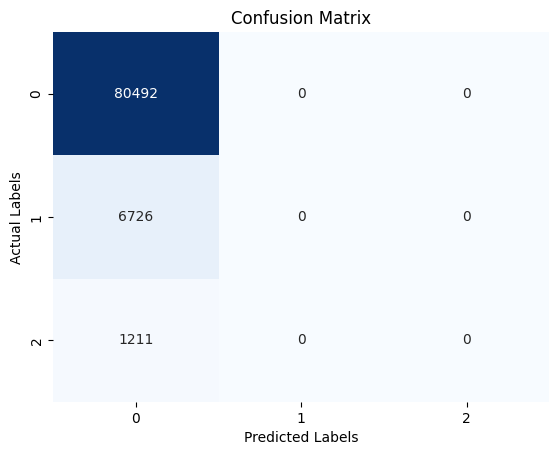

In [37]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [41]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     80492
         1.0       0.00      0.00      0.00      6726
         2.0       0.00      0.00      0.00      1211

    accuracy                           0.91     88429
   macro avg       0.30      0.33      0.32     88429
weighted avg       0.83      0.91      0.87     88429

